Import packages

In [1]:
# import the necessary packages
from imutils.object_detection import non_max_suppression # supress bounding boxes with weak scores
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

Function to display images in notebooks

In [2]:
def plt_imshow(title, image):
    # convert image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

Template matching input images

In [3]:
args = {
    "image": "images/8_diamonds.png",
    "template": "images/diamonds_template.png",
    # how strong of a match to keep/v/drop
    "threshold": 0.8
}

Load the images

[INFO] loading images...


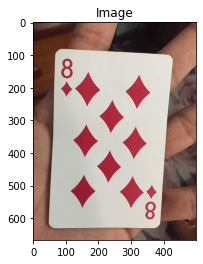

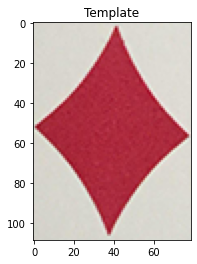

In [4]:
# load the input image and template image from disk, then grab the
# template image spatial dimensions
print("[INFO] loading images...")
image = cv2.imread(args["image"])
template = cv2.imread(args["template"])
# extract H and W
(tH, tW) = template.shape[:2]

# display the  image and template to our screen
plt_imshow("Image", image)
plt_imshow("Template", template)

In [5]:
# convert both the image and template to grayscale
# commonn for tempalte matching
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# perform template matching
print("[INFO] performing template matching...")
# pass gray image, template gray and coeff
result = cv2.matchTemplate(imageGray, templateGray,
	cv2.TM_CCOEFF_NORMED)

[INFO] performing template matching...


[INFO] 601 matched locations *before* NMS


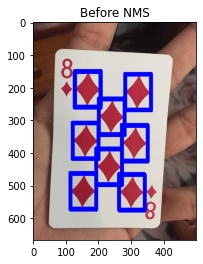

In [6]:
# np.where gives the XY coordinate match
# find all locations in the result map where the matched value is
# greater than the threshold, then clone our original image so we
# can draw on it
(yCoords, xCoords) = np.where(result >= args["threshold"])
clone = image.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))

# loop over our starting (x, y)-coordinates
for (x, y) in zip(xCoords, yCoords):
	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH),
		(255, 0, 0), 3)

# show our output image *before* applying non-maxima suppression
plt_imshow("Before NMS", clone)

[INFO] 8 matched locations *after* NMS


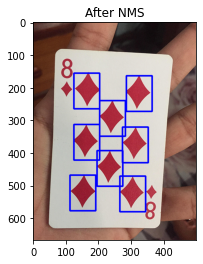

In [7]:
# initialize our list of rectangles
rects = []

# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles with bounding box coords
	rects.append((x, y, x + tW, y + tH))

# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))

# loop over the final bounding boxes
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	cv2.rectangle(image, (startX, startY), (endX, endY),
		(255, 0, 0), 3)

# show the output image
plt_imshow("After NMS", image)